In [4]:
import os, sys
import numpy as np
import h5py
import json
import seaborn as sb
import matplotlib.pyplot as plt
import pandas as pd

parent = os.path.abspath(os.getcwd() + "/../")
sys.path.append(parent)

from analyzer.model.utils.extracting import compute_region_size

gtfns_mouse = 'datasets/mouseA/mito_export_allgroups'

cell_type_vector_all = ['myelinated axon', 'spiny dendrite', 'unsure dendrite', 'smooth dendrite', 'e_axon', 
                        'i_axon', 'presynaptic bouton(ex)', 'presynaptic bouton(in)', 'dendritic spine (ex)', 
                        'cellbodies', 'glia', 'unsure axon', 'unsure neurite']

cell_type_vector_main = ['cellbodies', 'glia', 'unsure', 'axons', 'dendrites']

In [5]:
#sizef_mouse = compute_region_size(dprc='iter', fns=gtfns_mouse)

with h5py.File(parent + '/features/mouseA/sizef.h5', "r") as h5f:
    labels = np.array(h5f['id'], dtype=np.uint16)
        
    sizef_mouse = np.array(h5f['size'])
    print('Loaded {} features to cache.'.format('size'))
    
with h5py.File(parent + '/features/mouseA/circf.h5', "r") as h5f:
    cirf_mouse = np.array(h5f['circ'])
    
with h5py.File(parent + '/features/mouseA/surface_to_volumef.h5', "r") as h5f:
    sv_mouse = np.array(h5f['surface_to_volume'])
    
with h5py.File(parent + '/features/mouseA/slenf.h5', "r") as h5f:
    labels = np.array(h5f['id'], dtype=np.uint16)
        
    slenf_mouse = np.array(h5f['slen'])
    print('Loaded {} features to cache.'.format('skeleton length'))

with open(os.path.join(parent, 'features/mouseA/gt_vector_allgroups.json'), 'r') as f:
    gt_vector_all = np.array(json.loads(f.read()))
    print('all cells: ', np.unique(gt_vector_all))
    
with open(os.path.join(parent, 'features/mouseA/gt_vector.json'), 'r') as f:
    gt_vector_main = np.array(json.loads(f.read()))
    gt_main_values, gt_main_counts = np.unique(gt_vector_main, return_counts=True)
    print('main cells: ', gt_main_values)
    print('count main cells: ', gt_main_counts)
    #for idx, value in enumerate(list(np.unique(gt_vector))):
        #gt_vector[gt_vector == value] = idx
        
all_cell_labels = list()
for i in range(gt_vector_all.shape[0]):
    label = gt_vector_all[i]
    idx = np.argwhere(np.unique(gt_vector_all) == gt_vector_all[i])[0][0]
    all_cell_labels.append(cell_type_vector_all[idx])
        
main_cell_labels = list()
for i in range(gt_vector_main.shape[0]):
    label = gt_vector_main[i]
    idx = np.argwhere(np.unique(gt_vector_main) == gt_vector_main[i])[0][0]
    main_cell_labels.append(cell_type_vector_main[idx])

Loaded size features to cache.
Loaded skeleton length features to cache.
all cells:  [22231 22232 22233 22235 22236 22237 22238 22239 22240 22241 22243 22279
 23261]
main cells:  [22241 22243 23261 23299 23300]
count main cells:  [ 1102   715   114 18237  3106]


In [6]:
vol_data = np.swapaxes(np.stack((sizef_mouse, gt_vector_main)), 0, 1)
dataset = pd.DataFrame({'label': labels, 'gt_label': gt_vector_main, 'vol': sizef_mouse, 'skeleton_len': slenf_mouse, 'cell type': main_cell_labels, 'circ_f': cirf_mouse, 's2v': sv_mouse})

print(dataset)

       label  gt_label     vol  skeleton_len  cell type    circ_f       s2v
0          1     23300  164709    535.056274  dendrites  0.566431  0.071780
1          2     23300  116462    656.349348  dendrites  0.641276  0.093942
2          3     23299    4833     29.257025      axons  0.860658  0.173209
3          4     23299    6095     12.666822      axons  0.789618  0.113986
4          5     23299   23904     66.130513      axons  0.834063  0.107778
...      ...       ...     ...           ...        ...       ...       ...
23269  22081     23299    1614      1.732051      axons  0.782410  0.141066
23270  22085     23299    2662     18.055470      axons  0.567077  0.125859
23271  23209     23299    3170      3.316625      axons  0.686371  0.107010
23272  23210     23299    2223      1.732051      axons  0.589140  0.137692
23273  23212     23299    1981      2.449490      axons  0.648306  0.139399

[23274 rows x 7 columns]


[Text(0.5, 1.0, 'cell types')]

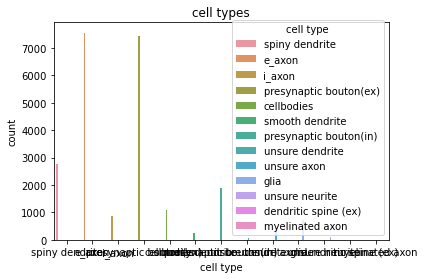

In [7]:
all_data = pd.DataFrame({'label': labels, 'gt_label': gt_vector_all, 'vol': sizef_mouse, 'skeleton_len': slenf_mouse, 'cell type': all_cell_labels, 'circ_f': cirf_mouse, 's2v': sv_mouse})
hp = sb.countplot(x=all_data['cell type'], hue=all_data['cell type'])
hp.set(title="cell types")
#tmp.savefig("cat_plot.svg")

[Text(0.5, 1.0, 'cell types')]

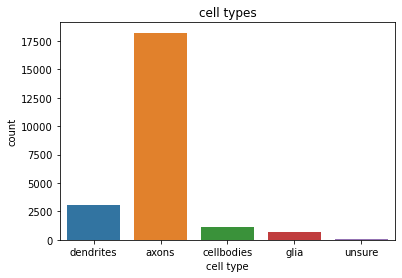

In [8]:
hp = sb.countplot(x=dataset['cell type'])
hp.set(title="cell types")

[Text(0.5, 1.0, 'cell types')]

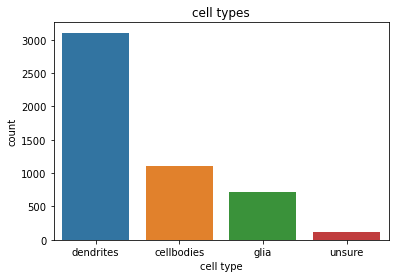

In [9]:
hp = sb.countplot(x=dataset.loc[dataset['cell type'] != "axons"]['cell type'])
hp.set(title="cell types")

[Text(0.5, 1.0, 'average circularity')]

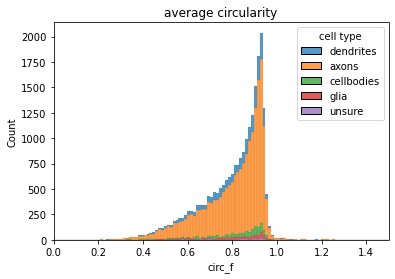

In [10]:
hp = sb.histplot(data=dataset, x="circ_f", hue="cell type", multiple="stack")
hp.set(xlim=(0, 1.5))
hp.set(title="average circularity")

[Text(0.5, 1.0, 'average circularity')]

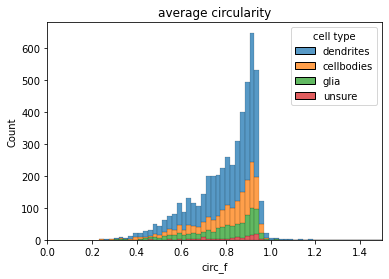

In [11]:
hp = sb.histplot(data=dataset.loc[dataset['cell type'] != "axons"], x="circ_f", hue="cell type", multiple="stack")
hp.set(xlim=(0, 1.5))
hp.set(title="average circularity")

[Text(0.5, 1.0, 'surface/volume')]

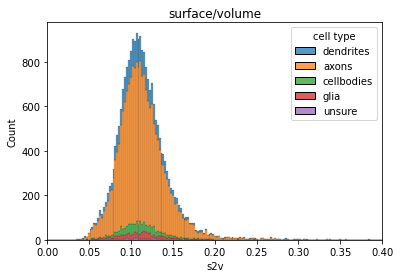

In [12]:
hp = sb.histplot(data=dataset, x="s2v", hue="cell type", multiple="stack")
hp.set(xlim=(0, 0.4))
hp.set(title="surface/volume")

[Text(0.5, 1.0, 'surface/volume')]

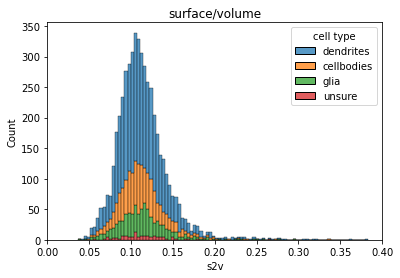

In [13]:
hp = sb.histplot(data=dataset.loc[dataset['cell type'] != "axons"], x="s2v", hue="cell type", multiple="stack")
hp.set(xlim=(0, 0.4))
hp.set(title="surface/volume")

[Text(0.5, 1.0, 'feature correlation')]

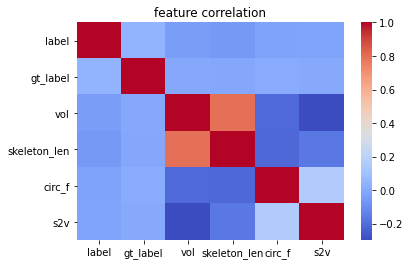

In [14]:
corr = dataset.corr()
hp = sb.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns, cmap="coolwarm")
hp.set(title="feature correlation")

<Figure size 3600x2880 with 0 Axes>

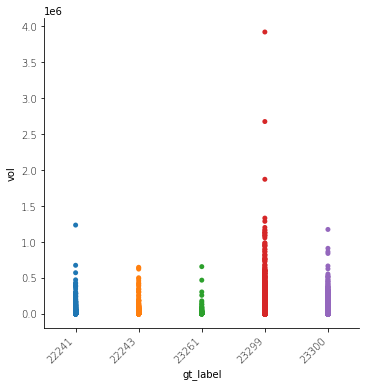

In [13]:
plt.figure(figsize=(50,40))

tmp = sb.catplot(x="gt_label", y="vol", jitter=False, data=dataset)
plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize=10  
)
plt.yticks(
    fontweight='light',
    fontsize=10
)
#sb.catplot(x="gt_label", y="vol", kind="box", data=dataset)
tmp.savefig("cat_plot.svg")


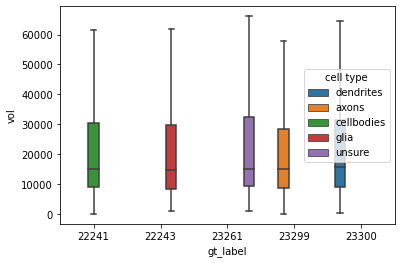

In [14]:
#sb.set_theme(style="ticks", palette="pastel")
boxx = sb.boxplot(x="gt_label", y="vol", hue='cell type', data=dataset, showfliers=False)
#boxx.set_yscale("log")

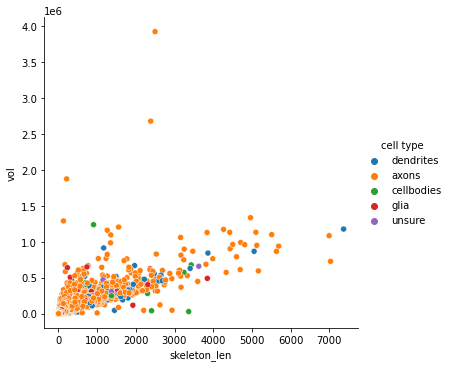

In [15]:
sb.relplot(x="skeleton_len", y="vol", hue="cell type", data=dataset)

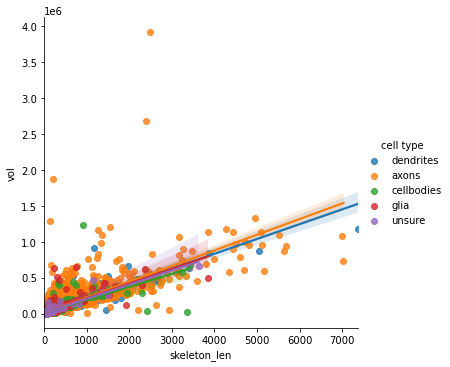

In [16]:
#sb.regplot(x="skeleton_len", y="vol", color="cell type", data=dataset)
g = sb.lmplot(
    data=dataset,
    x="skeleton_len", y="vol", hue="cell type",
    #height=5
)

<AxesSubplot:xlabel='vol', ylabel='circ_f'>

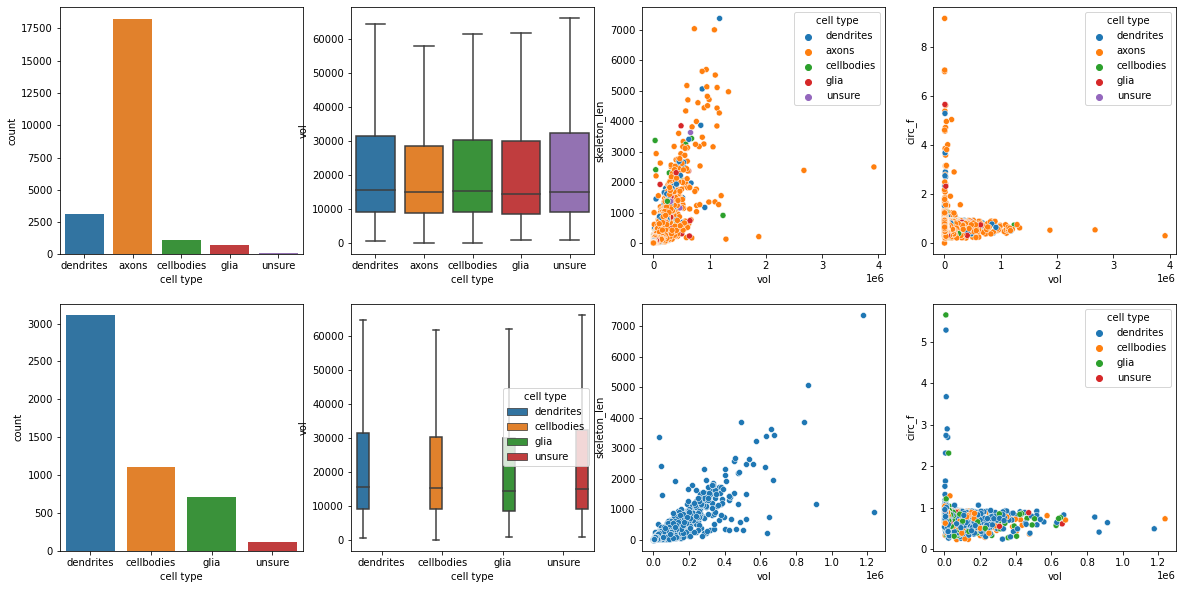

In [17]:
import seaborn as sns

fig, axes = plt.subplots(2, 4)
fig.set_figheight(10)
fig.set_figwidth(20)
sns.countplot(x="cell type", data=dataset, ax=axes[0,0])
sb.boxplot(x="cell type", y="vol", data=dataset, showfliers=False, ax=axes[0,1])
sns.scatterplot(x="vol", y="skeleton_len", hue="cell type", data=dataset,ax=axes[0,2])
sns.scatterplot(x="vol", y="circ_f", hue="cell type", data=dataset,ax=axes[0,3])

sns.countplot(x="cell type", data=dataset.loc[dataset['cell type'] != "axons"], ax=axes[1,0])
sb.boxplot(x="cell type", y="vol", hue='cell type', data=dataset.loc[dataset['cell type'] != "axons"], showfliers=False, ax=axes[1,1])
sns.scatterplot(x="vol", y="skeleton_len", data=dataset.loc[dataset['cell type'] != "axons"],ax=axes[1,2])
sns.scatterplot(x="vol", y="circ_f", hue="cell type", data=dataset.loc[dataset['cell type'] != "axons"],ax=axes[1,3])

In [3]:
import os
import sys
import h5py
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

parent = os.path.abspath(os.getcwd() + "/../")
sys.path.append(parent)

with h5py.File(os.path.join(parent, 'features/mouseA/spatial_densityf.h5'), 'r') as spatial_dist_file:
    spatial_volume = np.array(spatial_dist_file["volume"])
    spatial_count = np.array(spatial_dist_file["count"])

[Text(0.5, 69.00000000000009, 'y'),
 Text(946.764705882353, 0.5, 'z'),
 Text(0.5, 1.0, 'mito count')]

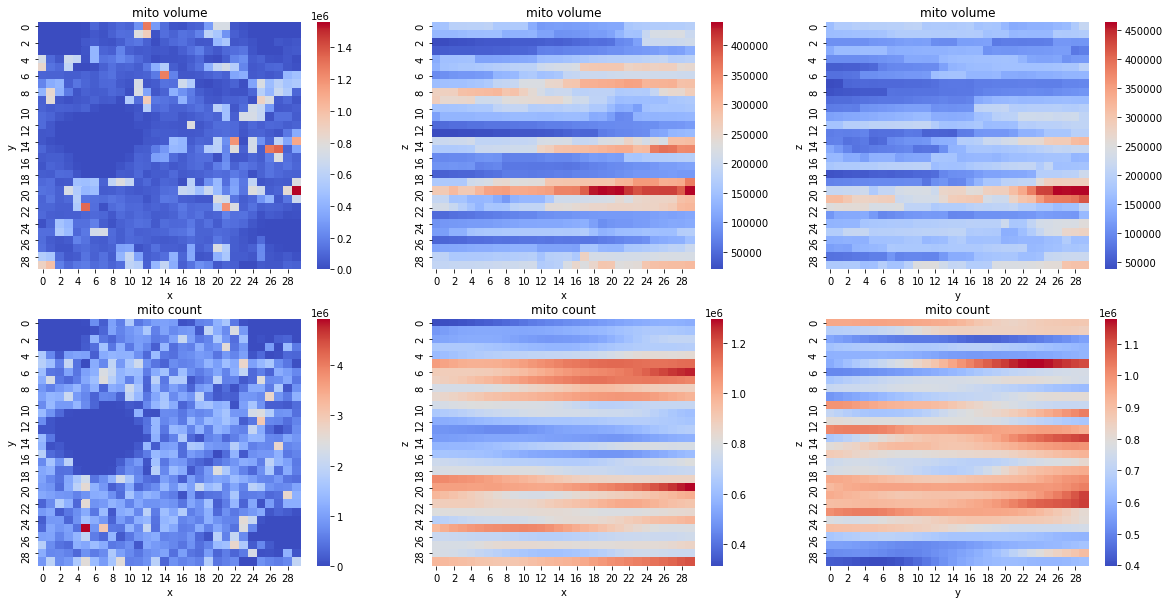

In [4]:
fig, axes = plt.subplots(2, 3)
spatial_volume_xy = np.sum(spatial_volume, axis=2)
spatial_volume_xz = np.sum(spatial_volume, axis=1)
spatial_volume_yz = np.sum(spatial_volume, axis=0)

spatial_count_xy = np.sum(spatial_count, axis=2)
spatial_count_xz = np.sum(spatial_count, axis=1)
spatial_count_yz = np.sum(spatial_count, axis=0)
fig.set_figheight(10)
fig.set_figwidth(20)

vxy = sns.heatmap(spatial_volume_xy, ax=axes[0,0], cmap='coolwarm')
vxy.set(xlabel='x', ylabel='y', title="mito volume")

vxz = sns.heatmap(spatial_volume_xz, ax=axes[0,1], cmap='coolwarm')
vxz.set(xlabel='x', ylabel='z', title="mito volume")

vyz = sns.heatmap(spatial_volume_yz, ax=axes[0,2], cmap='coolwarm')
vyz.set(xlabel='y', ylabel='z', title="mito volume")

cxy = sns.heatmap(spatial_count_xy, ax=axes[1,0], cmap='coolwarm')
cxy.set(xlabel='x', ylabel='y', title="mito count")

cxz = sns.heatmap(spatial_count_xz, ax=axes[1,1], cmap='coolwarm')
cxz.set(xlabel='x', ylabel='z', title="mito count")

cyz = sns.heatmap(spatial_count_yz, ax=axes[1,2], cmap='coolwarm')
cyz.set(xlabel='y', ylabel='z', title="mito count")

In [5]:
import os
import sys
import h5py
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

parent = os.path.abspath(os.getcwd() + "/../")
sys.path.append(parent)

with h5py.File(os.path.join(parent, 'features/mouseA/spatial_densityf_nuc.h5'), 'r') as spatial_dist_file:
    spatial_volume = np.array(spatial_dist_file["volume"])
    spatial_count = np.array(spatial_dist_file["count"])

[Text(0.5, 69.00000000000009, 'y'),
 Text(946.764705882353, 0.5, 'z'),
 Text(0.5, 1.0, 'nuclei count')]

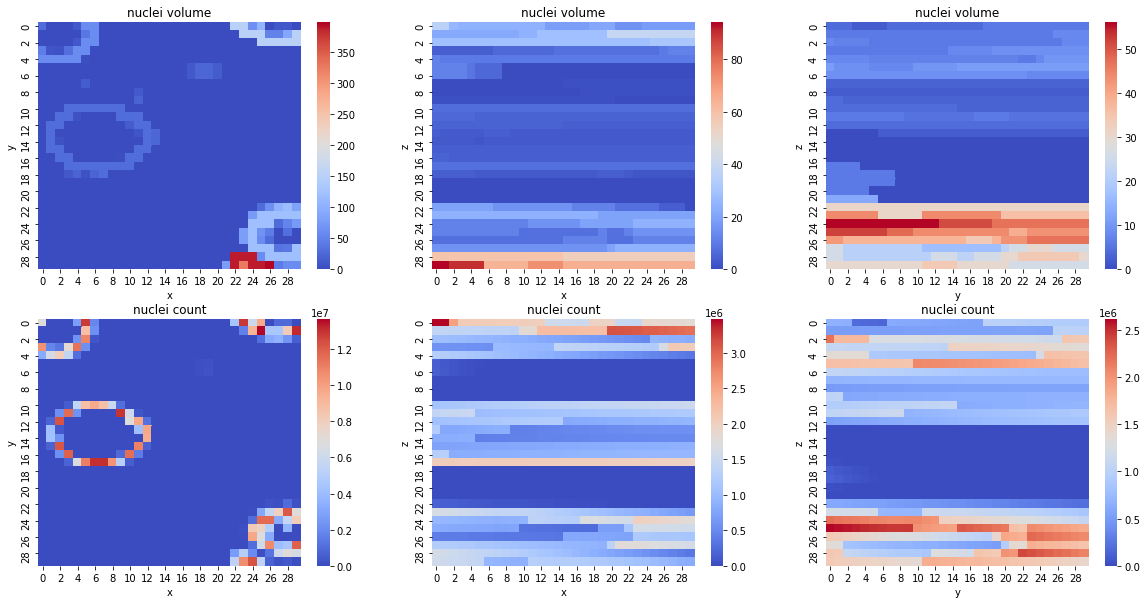

In [6]:
fig, axes = plt.subplots(2, 3)
spatial_volume_xy = np.sum(spatial_volume, axis=2)
spatial_volume_xz = np.sum(spatial_volume, axis=1)
spatial_volume_yz = np.sum(spatial_volume, axis=0)

spatial_count_xy = np.sum(spatial_count, axis=2)
spatial_count_xz = np.sum(spatial_count, axis=1)
spatial_count_yz = np.sum(spatial_count, axis=0)
fig.set_figheight(10)
fig.set_figwidth(20)

vxy = sns.heatmap(spatial_volume_xy, ax=axes[0,0], cmap='coolwarm')
vxy.set(xlabel='x', ylabel='y', title="nuclei volume")

vxz = sns.heatmap(spatial_volume_xz, ax=axes[0,1], cmap='coolwarm')
vxz.set(xlabel='x', ylabel='z', title="nuclei volume")

vyz = sns.heatmap(spatial_volume_yz, ax=axes[0,2], cmap='coolwarm')
vyz.set(xlabel='y', ylabel='z', title="nuclei volume")

cxy = sns.heatmap(spatial_count_xy, ax=axes[1,0], cmap='coolwarm')
cxy.set(xlabel='x', ylabel='y', title="nuclei count")

cxz = sns.heatmap(spatial_count_xz, ax=axes[1,1], cmap='coolwarm')
cxz.set(xlabel='x', ylabel='z', title="nuclei count")

cyz = sns.heatmap(spatial_count_yz, ax=axes[1,2], cmap='coolwarm')
cyz.set(xlabel='y', ylabel='z', title="nuclei count")